In [3]:
IMAGE_SIZE = 28
BATCH_SIZE = 128
EPOCHS = 50
WEIGHT_INIT = 0.05
WEIGHT_DECAY = 1e-4

In [4]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

path = "/kaggle/input/datasetbiensovn/char_bien_so/"
X_digits = []
y_digits = []

for fi in os.listdir(path):
    if fi == "0":
        label = 21
    elif fi == "1":
        label = 22
    elif fi == "2":
        label = 23
    elif fi == "3":
        label = 24
    elif fi == "4":
        label = 25
    elif fi == "5":
        label = 26
    elif fi == "6":
        label = 27
    elif fi == "7":
        label = 28
    elif fi == "8":
        label = 29
    elif fi == "9":
        label = 30
    elif fi == "BG":
        label = 31
    else:
        continue

    img_fi_path = os.listdir(path + fi)
    for img_path in img_fi_path:
        img = cv2.imread(path + fi + "/" + img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28), cv2.INTER_AREA)
        img = img.reshape((28, 28, 1))
        X_digits.append(img)
        y_digits.append(label)

X_digits = np.array(X_digits)
y_digits = np.array(y_digits)

# ALPHAS
X_alphas = []
y_alphas = []

for fi in os.listdir(path):
    if fi == "A":
        label = 0
    elif fi == "B":
        label = 1
    elif fi == "C":
        label = 2
    elif fi == "D":
        label = 3
    elif fi == "E":
        label = 4
    elif fi == "F":
        label = 5
    elif fi == "G":
        label = 6
    elif fi == "H":
        label = 7
    elif fi == "K":
        label = 8
    elif fi == "L":
        label = 9
    elif fi == "M":
        label = 10
    elif fi == "N":
        label = 11
    elif fi == "P":
        label = 12
    elif fi == "R":
        label = 13
    elif fi == "S":
        label = 14
    elif fi == "T":
        label = 15
    elif fi == "U":
        label = 16
    elif fi == "V":
        label = 17
    elif fi == "X":
        label = 18
    elif fi == "Y":
        label = 19
    elif fi == "Z":
        label = 20
    else:
        continue

    img_fi_path = os.listdir(path + fi)
    for img_path in img_fi_path:
        img = cv2.imread(path + fi + "/" + img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28), cv2.INTER_AREA)
        img = img.reshape((28, 28, 1))
        X_alphas.append(img)
        y_alphas.append(label)

X_alphas = np.array(X_alphas)
y_alphas = np.array(y_alphas)

# Tách dữ liệu chữ số thành tập train (70%), validation (15%) và test (15%)
X_train_digits, X_temp_digits, y_train_digits, y_temp_digits = train_test_split(
    X_digits, y_digits, test_size=0.3, random_state=42, stratify=y_digits
)
X_val_digits, X_test_digits, y_val_digits, y_test_digits = train_test_split(
    X_temp_digits, y_temp_digits, test_size=0.5, random_state=42, stratify=y_temp_digits
)

# Tách dữ liệu chữ cái thành tập train (70%), validation (15%) và test (15%)
X_train_alphas, X_temp_alphas, y_train_alphas, y_temp_alphas = train_test_split(
    X_alphas, y_alphas, test_size=0.3, random_state=42, stratify=y_alphas
)
X_val_alphas, X_test_alphas, y_val_alphas, y_test_alphas = train_test_split(
    X_temp_alphas, y_temp_alphas, test_size=0.5, random_state=42, stratify=y_temp_alphas
)

# Lưu dữ liệu chữ số
np.save("/kaggle/working/digits_X_train.npy", X_train_digits)
np.save("/kaggle/working/digits_y_train.npy", y_train_digits)
np.save("/kaggle/working/digits_X_val.npy", X_val_digits)
np.save("/kaggle/working/digits_y_val.npy", y_val_digits)
np.save("/kaggle/working/digits_X_test.npy", X_test_digits)
np.save("/kaggle/working/digits_y_test.npy", y_test_digits)

# Lưu dữ liệu chữ cái
np.save("/kaggle/working/alphas_X_train.npy", X_train_alphas)
np.save("/kaggle/working/alphas_y_train.npy", y_train_alphas)
np.save("/kaggle/working/alphas_X_val.npy", X_val_alphas)
np.save("/kaggle/working/alphas_y_val.npy", y_val_alphas)
np.save("/kaggle/working/alphas_X_test.npy", X_test_alphas)
np.save("/kaggle/working/alphas_y_test.npy", y_test_alphas)

# In thông tin về kích thước các tập dữ liệu
print("Chữ số:")
print(f"Tập huấn luyện: {X_train_digits.shape[0]} mẫu")
print(f"Tập xác thực: {X_val_digits.shape[0]} mẫu")
print(f"Tập kiểm tra: {X_test_digits.shape[0]} mẫu")

print("\nChữ cái:")
print(f"Tập huấn luyện: {X_train_alphas.shape[0]} mẫu")
print(f"Tập xác thực: {X_val_alphas.shape[0]} mẫu")
print(f"Tập kiểm tra: {X_test_alphas.shape[0]} mẫu")

Chữ số:
Tập huấn luyện: 700 mẫu
Tập xác thực: 150 mẫu
Tập kiểm tra: 150 mẫu

Chữ cái:
Tập huấn luyện: 1470 mẫu
Tập xác thực: 315 mẫu
Tập kiểm tra: 315 mẫu


In [6]:
import tensorflow.keras as keras
import numpy as np


class Datasets(object):
    def __init__(self, mode='train'):
        """
        Khởi tạo lớp Datasets với mode xác định tập dữ liệu cần tải
        mode: 'train', 'val' hoặc 'test'
        """
        self.mode = mode
        self.all_data = []

        # Input data
        self.digits_data = self.get_digits_data()
        self.alphas_data = self.get_alphas_data()
        self.convert_data_format()
        
    def get_digits_data(self):
        """Tải dữ liệu chữ số dựa trên mode"""
        X = np.load(f"/kaggle/working/digits_X_{self.mode}.npy")
        y = np.load(f"/kaggle/working/digits_y_{self.mode}.npy")
        return list(zip(X, y))
    
    def get_alphas_data(self):
        """Tải dữ liệu chữ cái dựa trên mode"""
        X = np.load(f"/kaggle/working/alphas_X_{self.mode}.npy")
        y = np.load(f"/kaggle/working/alphas_y_{self.mode}.npy")
        return list(zip(X, y))

    def gen(self):
        """Trộn và trả về dữ liệu"""
        np.random.shuffle(self.all_data)
        images = []
        labels = []

        for i in range(len(self.all_data)):
            image, label = self.all_data[i]
            images.append(image)
            labels.append(label)

        labels = keras.utils.to_categorical(labels, num_classes=32)
        return images, labels

    def convert_data_format(self):
        """Kết hợp dữ liệu chữ số và chữ cái"""
        # Digits data
        for i in range(len(self.digits_data)):
            image = self.digits_data[i][0]
            label = self.digits_data[i][1]
            self.all_data.append((image, label))

        # Alpha data - tăng gấp 8 lần chỉ cho tập train
        nb_alphas_data = len(self.alphas_data)
        if self.mode == 'train':
            # Tăng dữ liệu chữ cái 8 lần cho tập huấn luyện
            for i in range(nb_alphas_data * 8):
                image = self.alphas_data[i % nb_alphas_data][0]
                label = self.alphas_data[i % nb_alphas_data][1]
                self.all_data.append((image, label))
        else:
            # Không tăng dữ liệu cho tập validation và test
            for i in range(nb_alphas_data):
                image = self.alphas_data[i][0]
                label = self.alphas_data[i][1]
                self.all_data.append((image, label))

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import Sequential
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
import warnings

# Suppress specific sklearn warnings about zero division
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.metrics")



ALPHA_DICT = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'K', 9: 'L', 10: 'M', 11: 'N', 12: 'P',
              13: 'R', 14: 'S', 15: 'T', 16: 'U', 17: 'V', 18: 'X', 19: 'Y', 20: 'Z', 21: '0', 22: '1', 23: '2', 24: '3',
              25: '4', 26: '5', 27: '6', 28: '7', 29: '8', 30: '9', 31: "Background"}

class CNN_Model(object):
    def __init__(self, trainable=True):
        self.batch_size = BATCH_SIZE
        self.trainable = trainable
        self.num_epochs = EPOCHS
        # Building model
        self._build_model()
        # Input data
        if trainable:
            self.model.summary()
            self.train_data = Datasets(mode='train')
            self.val_data = Datasets(mode='val')
            self.test_data = Datasets(mode='test')
        self.model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(1e-3), metrics=['acc'])
    
    def _build_model(self):
        # CNN model
        self.model = Sequential()
        self.model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
        self.model.add(Conv2D(32, (3, 3), activation='relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(0.25))
        self.model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
        self.model.add(Conv2D(64, (3, 3), activation='relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(0.25))
        self.model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
        self.model.add(Conv2D(64, (3, 3), activation='relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(0.25))
        self.model.add(Flatten())
        self.model.add(Dense(512, activation='relu'))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(32, activation='softmax'))
    
    # Calculate F1 score for each epoch
    def calculate_f1(self, X, y_true_one_hot):
        y_pred = self.model.predict(X)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true_classes = np.argmax(y_true_one_hot, axis=1)
        # Add zero_division=1 to handle classes with no predicted samples
        macro_f1 = f1_score(y_true_classes, y_pred_classes, average='macro', zero_division=1)
        return macro_f1
    
    # Helper function to convert one-hot encoded labels to class indices
    def one_hot_to_indices(self, one_hot_labels):
        return np.argmax(one_hot_labels, axis=1)
        
    def train(self):
        # Your existing training code
        reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1)
        # Model Checkpoint
        cpt_save = ModelCheckpoint('/kaggle/working/weight.keras', save_best_only=True, monitor='val_acc', mode='max')
        
        print("Training......")
        trainX, trainY = self.train_data.gen()
        trainX = np.array(trainX)
        
        # Get validation and test data
        valX, valY = self.val_data.gen()
        valX = np.array(valX)
        
        testX, testY = self.test_data.gen()
        testX = np.array(testX)
        
        # Lists to store metrics for each epoch
        train_acc_history = []
        val_acc_history = []
        train_f1_history = []
        val_f1_history = []
        
        # Custom training loop to track F1 score
        for epoch in range(self.num_epochs):
            print(f"\nEpoch {epoch+1}/{self.num_epochs}")
            
            # Train for one epoch
            history = self.model.fit(
                trainX, trainY, 
                validation_data=(valX, valY),
                verbose=1,
                epochs=1, 
                batch_size=self.batch_size,
                callbacks=[cpt_save, reduce_lr]
            )
            
            # Calculate accuracy metrics
            train_acc = history.history['acc'][0]
            val_acc = history.history['val_acc'][0]
            
            # Calculate F1 scores
            train_f1 = self.calculate_f1(trainX, trainY)
            val_f1 = self.calculate_f1(valX, valY)
            
            # Store metrics
            train_acc_history.append(train_acc)
            val_acc_history.append(val_acc)
            train_f1_history.append(train_f1)
            val_f1_history.append(val_f1)
            
            print(f"Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")
            print(f"Train F1 Score: {train_f1:.4f}, Validation F1 Score: {val_f1:.4f}")
        
        # Save the complete model in .h5 format
        self.model.save('/kaggle/working/weight.h5')
        print("Model saved successfully as .h5 file")
        
        # Final evaluation on training and validation sets
        print("\n--- Final Model Evaluation ---")
        
        # Evaluate on training set
        train_loss, train_acc = self.model.evaluate(trainX, trainY, verbose=0)
        train_f1 = self.calculate_f1(trainX, trainY)
        print(f"Training Data - Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}, F1 Score: {train_f1:.4f}")
        
        # Evaluate on validation set
        val_loss, val_acc = self.model.evaluate(valX, valY, verbose=0)
        val_f1 = self.calculate_f1(valX, valY)
        print(f"Validation Data - Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}, F1 Score: {val_f1:.4f}")
        
        # Evaluate on test set
        test_loss, test_acc = self.model.evaluate(testX, testY, verbose=0)
        test_f1 = self.calculate_f1(testX, testY)
        print(f"Test Data - Loss: {test_loss:.4f}, Accuracy: {test_acc:.4f}, F1 Score: {test_f1:.4f}")
        
        # Generate detailed classification report for validation set
        y_pred_val = self.model.predict(valX)
        y_pred_val_classes = np.argmax(y_pred_val, axis=1)
        y_true_val_classes = np.argmax(valY, axis=1)
        
        print("\nClassification Report on Validation Data:")
        print(classification_report(y_true_val_classes, y_pred_val_classes, 
                                  target_names=[ALPHA_DICT[i] for i in range(31)],
                                  zero_division=1))
        
        # Generate detailed classification report for test set
        y_pred_test = self.model.predict(testX)
        y_pred_test_classes = np.argmax(y_pred_test, axis=1)
        y_true_test_classes = np.argmax(testY, axis=1)
        
        print("\nClassification Report on Test Data:")
        print(classification_report(y_true_test_classes, y_pred_test_classes, 
                                  target_names=[ALPHA_DICT[i] for i in range(31)],
                                  zero_division=1))
        
        # Plot accuracy and F1 score learning curves
        self.plot_learning_curves(train_acc_history, val_acc_history, train_f1_history, val_f1_history, test_acc, test_f1)
    
    def plot_learning_curves(self, train_acc, val_acc, train_f1, val_f1, test_acc=None, test_f1=None):
        """
        Plot learning curves for accuracy and F1 score
        """
        epochs = range(1, len(train_acc) + 1)
        
        plt.figure(figsize=(18, 6))
        
        # Plot accuracy
        plt.subplot(1, 3, 1)
        plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
        plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
        plt.title('Biểu đồ Accuracy theo Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        if test_acc is not None:
            # Add test accuracy as horizontal line
            plt.axhline(y=test_acc, color='g', linestyle='--', label=f'Test Accuracy: {test_acc:.4f}')
        plt.legend()
        plt.grid(True)
        
        # Plot F1 score
        plt.subplot(1, 3, 2)
        plt.plot(epochs, train_f1, 'b-', label='Training F1 Score')
        plt.plot(epochs, val_f1, 'r-', label='Validation F1 Score')
        plt.title('Biểu đồ F1-score theo Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('F1 Score')
        if test_f1 is not None:
            # Add test F1 score as horizontal line
            plt.axhline(y=test_f1, color='g', linestyle='--', label=f'Test F1: {test_f1:.4f}')
        plt.legend()
        plt.grid(True)
        
        # Plot test metrics
        plt.subplot(1, 3, 3)
        x = ['Accuracy', 'F1 Score']
        if test_acc is not None and test_f1 is not None:
            train_metrics = [train_acc[-1], train_f1[-1]]  # Final values
            val_metrics = [val_acc[-1], val_f1[-1]]  # Final values
            test_metrics = [test_acc, test_f1]
            
            x_pos = np.arange(len(x))
            width = 0.2
            
            plt.bar(x_pos - width, train_metrics, width, label='Train', color='blue')
            plt.bar(x_pos, val_metrics, width, label='Validation', color='red')
            plt.bar(x_pos + width, test_metrics, width, label='Test', color='green')
            
            plt.ylabel('Score')
            plt.title('Final Model Performance')
            plt.xticks(x_pos, x)
            plt.legend()
            plt.grid(True, axis='y')
            
        plt.tight_layout()
        plt.savefig('/kaggle/working/learning_curves.png')
        plt.show()
        
        # Generate additional detailed plots
        plt.figure(figsize=(10, 8))
        plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
        plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
        if test_acc is not None:
            plt.axhline(y=test_acc, color='g', linestyle='--', label=f'Test Accuracy: {test_acc:.4f}')
        plt.title('Training, Validation, and Test Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.savefig('/kaggle/working/accuracy_curve.png')
        plt.show()
        
        plt.figure(figsize=(10, 8))
        plt.plot(epochs, train_f1, 'bo-', label='Training F1 Score')
        plt.plot(epochs, val_f1, 'ro-', label='Validation F1 Score')
        if test_f1 is not None:
            plt.axhline(y=test_f1, color='g', linestyle='--', label=f'Test F1: {test_f1:.4f}')
        plt.title('Training, Validation, and Test F1 Score')
        plt.xlabel('Epochs')
        plt.ylabel('F1 Score')
        plt.legend()
        plt.grid(True)
        plt.savefig('/kaggle/working/f1_curve.png')
        plt.show()

In [6]:
model = CNN_Model(trainable=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-23 09:24:51.030638: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │          16,416 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 188,544 (736.50 KB)

 Trainable params: 188,544 (736.50 KB)

 Non-trainable params: 0 (0.00 B)

Training......

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 201ms/step - acc: 0.1731 - loss: 2.9834 - val_acc: 0.7054 - val_loss: 0.8702 - learning_rate: 0.0010
390/390 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Train Accuracy: 0.3934, Validation Accuracy: 0.7054
Train F1 Score: 0.7297, Validation F1 Score: 0.6409

Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 196ms/step - acc: 0.8643 - loss: 0.4585 - val_acc: 0.8645 - val_loss: 0.3821 - learning_rate: 0.0010
390/390 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Train Accuracy: 0.8937, Validation Accuracy: 0.8645
Train F1 Score: 0.8896, Validation F1 Score: 0.8366

Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 186ms/step - acc: 0.9318 - loss: 0.2150 - val_acc: 0.8839 - val_loss: 0.3273 - learning_rate: 0.0010
390/390 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Train Accuracy: 0.9403, Validation Accuracy: 0.8839
Train F1 Score: 0.9086, Validation F1 Score: 0.

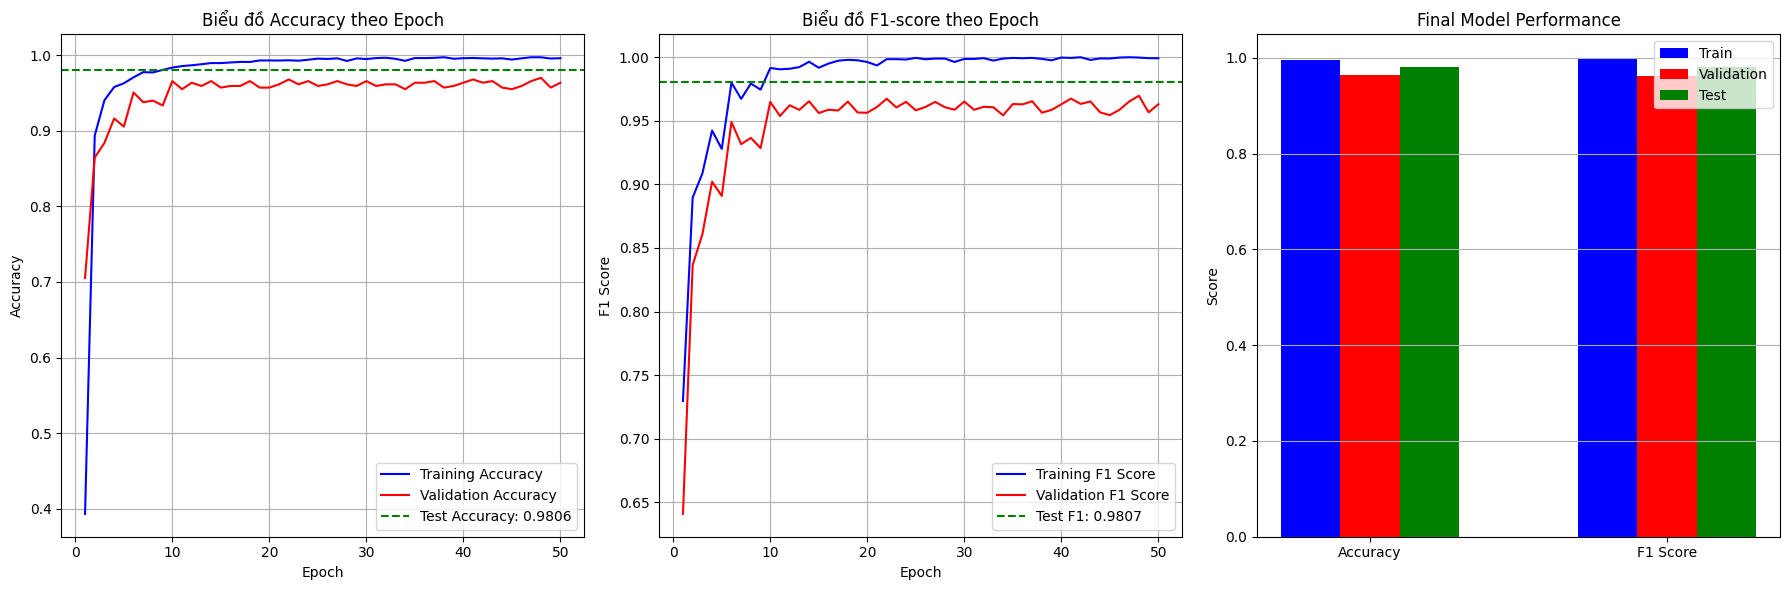

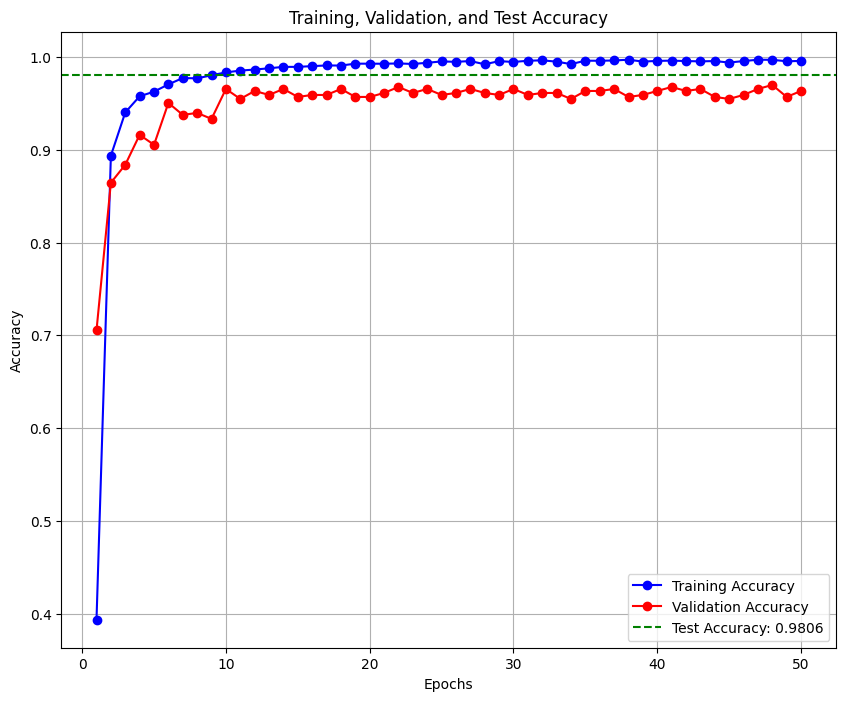

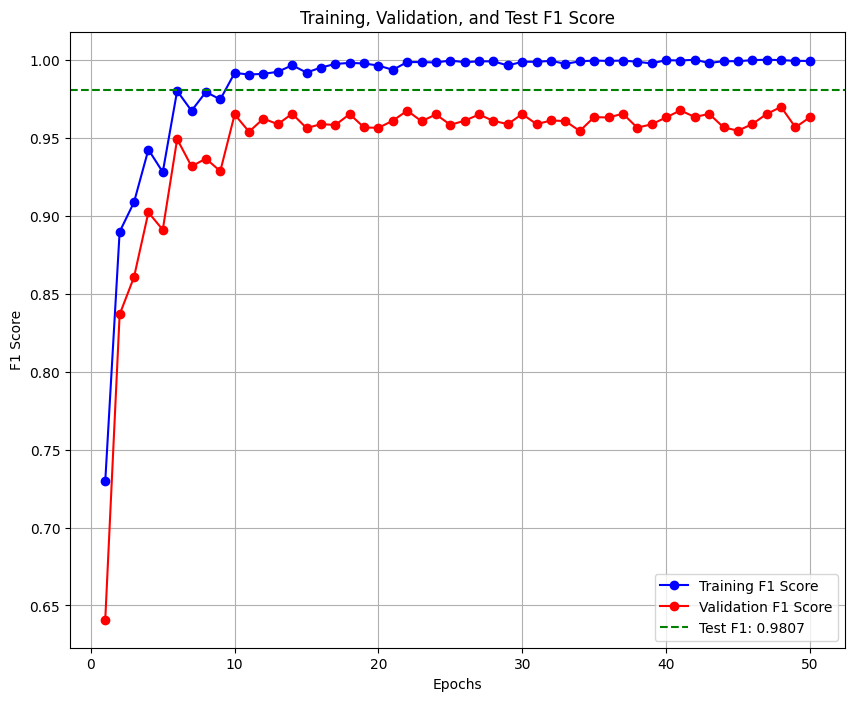

In [7]:
model.train()